<a href="https://www.kaggle.com/code/abdalrhamnhebishy/cnn-churn-modeling?scriptVersionId=194804782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--j3p-content-font-size4);
    background-color:#008080  ;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')  

## Churn_modeling

<img src="https://www.shutterstock.com/shutterstock/photos/2473389571/display_1500/stock-photo-business-team-calculate-and-analyzing-graph-document-financial-with-laptop-and-digital-tablet-in-2473389571.jpg" alt="My Image">

## Table of Contents 

<div style="border: 2px solid #008080; padding: 10px; background-color: #F5F5F5 ; color: black; border-radius: 30px 45px 30px 45px;">

   
    
    
<p> &bull;        <a target="_blank"> Introudction</a>  </p> 

<p> &bull;      <a target="_blank"> Explantory Data Analysis</a>  </p>

<p>&bull;       <a target="_blank"> Data Processing</a>  </p>

<p>&bull;       <a target="_blank"> Model Bulding</a> </p>   
    
<p>&bull;       <a target="_blank"> Evalution Metrics </a> </p>   

</div>

## Import Libararies 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from plotly.graph_objs import *
import plotly.express as px
from sklearn.feature_selection import VarianceThreshold
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras 
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import BinaryCrossentropy


2024-08-31 16:09:23.252032: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-08-31 16:09:23.253463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-31 16:09:23.283409: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-08-31 16:09:23.284107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

2024-08-31 16:09:23.805072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

 ## Explore the Data 

In [3]:
# load the data:

data=pd.read_csv("churn_modeling.csv")
data.head(25)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))



<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           10000 non-null  int64  

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(2), int64(9), object(3)

memory usage: 1.1+ MB

None

-------------------------

shape of the dataset -->> (10000, 14)


In [5]:
#get the statistical:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# get Types of data:

data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in RowNumber -->> 

 RowNumber

1        1

6671     1

6664     1

6665     1

6666     1

        ..

3334     1

3335     1

3336     1

3337     1

10000    1

Name: count, Length: 10000, dtype: int64

-------------------------

counts of items in CustomerId -->> 

 CustomerId

15634602    1

15667932    1

15766185    1

15667632    1

15599024    1

           ..

15599078    1

15702300    1

15660735    1

15671390    1

15628319    1

Name: count, Length: 10000, dtype: int64

-------------------------

counts of items in Surname -->> 

 Surname

Smith       32

Scott       29

Martin      29

Walker      28

Brown       26

            ..

Izmailov     1

Bold         1

Bonham       1

Poninski     1

Burbidge     1

Name: count, Length: 2932, dtype: int64

-------------------------

counts of items in CreditScore -->> 

 CreditScore

850    233

678     63

655     54

705     53

667     53

      ... 

404      1

351      1

365      1

417      1

419    

In [8]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>RowNumber column  :  

[    1     2     3 ...  9998  9999 10000]

**************************************************

All items in the ---->>>CustomerId column  :  

[15634602 15647311 15619304 ... 15584532 15682355 15628319]

**************************************************

All items in the ---->>>Surname column  :  

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

**************************************************

All items in the ---->>>CreditScore column  :  

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587

 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490

 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725

 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678

 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773

 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625

 432 770 758 795 686 789 589 461 584 579 

In [9]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Surname', 'Geography', 'Gender'], dtype='object')

 Numerical_columns ----->>> Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',

       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',

       'Exited'],

      dtype='object') 

 Discrete_columns ---->>> Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',

       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],

      dtype='object') 

 Continous_cols ----->> Index(['Balance', 'EstimatedSalary'], dtype='object') 

 Nominal Columns --->> Gender            2

HasCrCard         2

IsActiveMember    2

Exited            2

dtype: int64


In [10]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [11]:
class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [12]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
# Calculate the correlation & plot the heatmap-correlation Matrix:

corr=data.select_dtypes("number").corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [14]:
# Calculate the correlation & plot the heatmap-correlation Matrix:

corr=data.select_dtypes("number").corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


(0.0, 1.05)

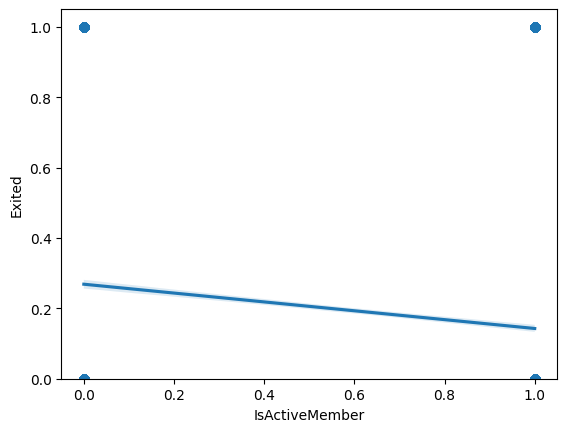

In [15]:
# Negative Relationship between Exited .vs IsActiveMember
sns.regplot(x=data["IsActiveMember"],y=data["Exited"])
plt.ylim(0,)

(0.0, 209991.52500000002)

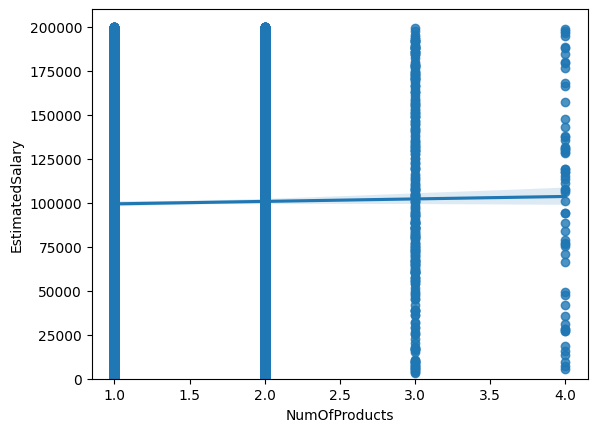

In [16]:
# very weak positve Relation ship :
sns.regplot(x=data["NumOfProducts"],y=data["EstimatedSalary"])
plt.ylim(0,)

Text(0.5, 1.0, 'Correlation_HEatmap_MAtrix')

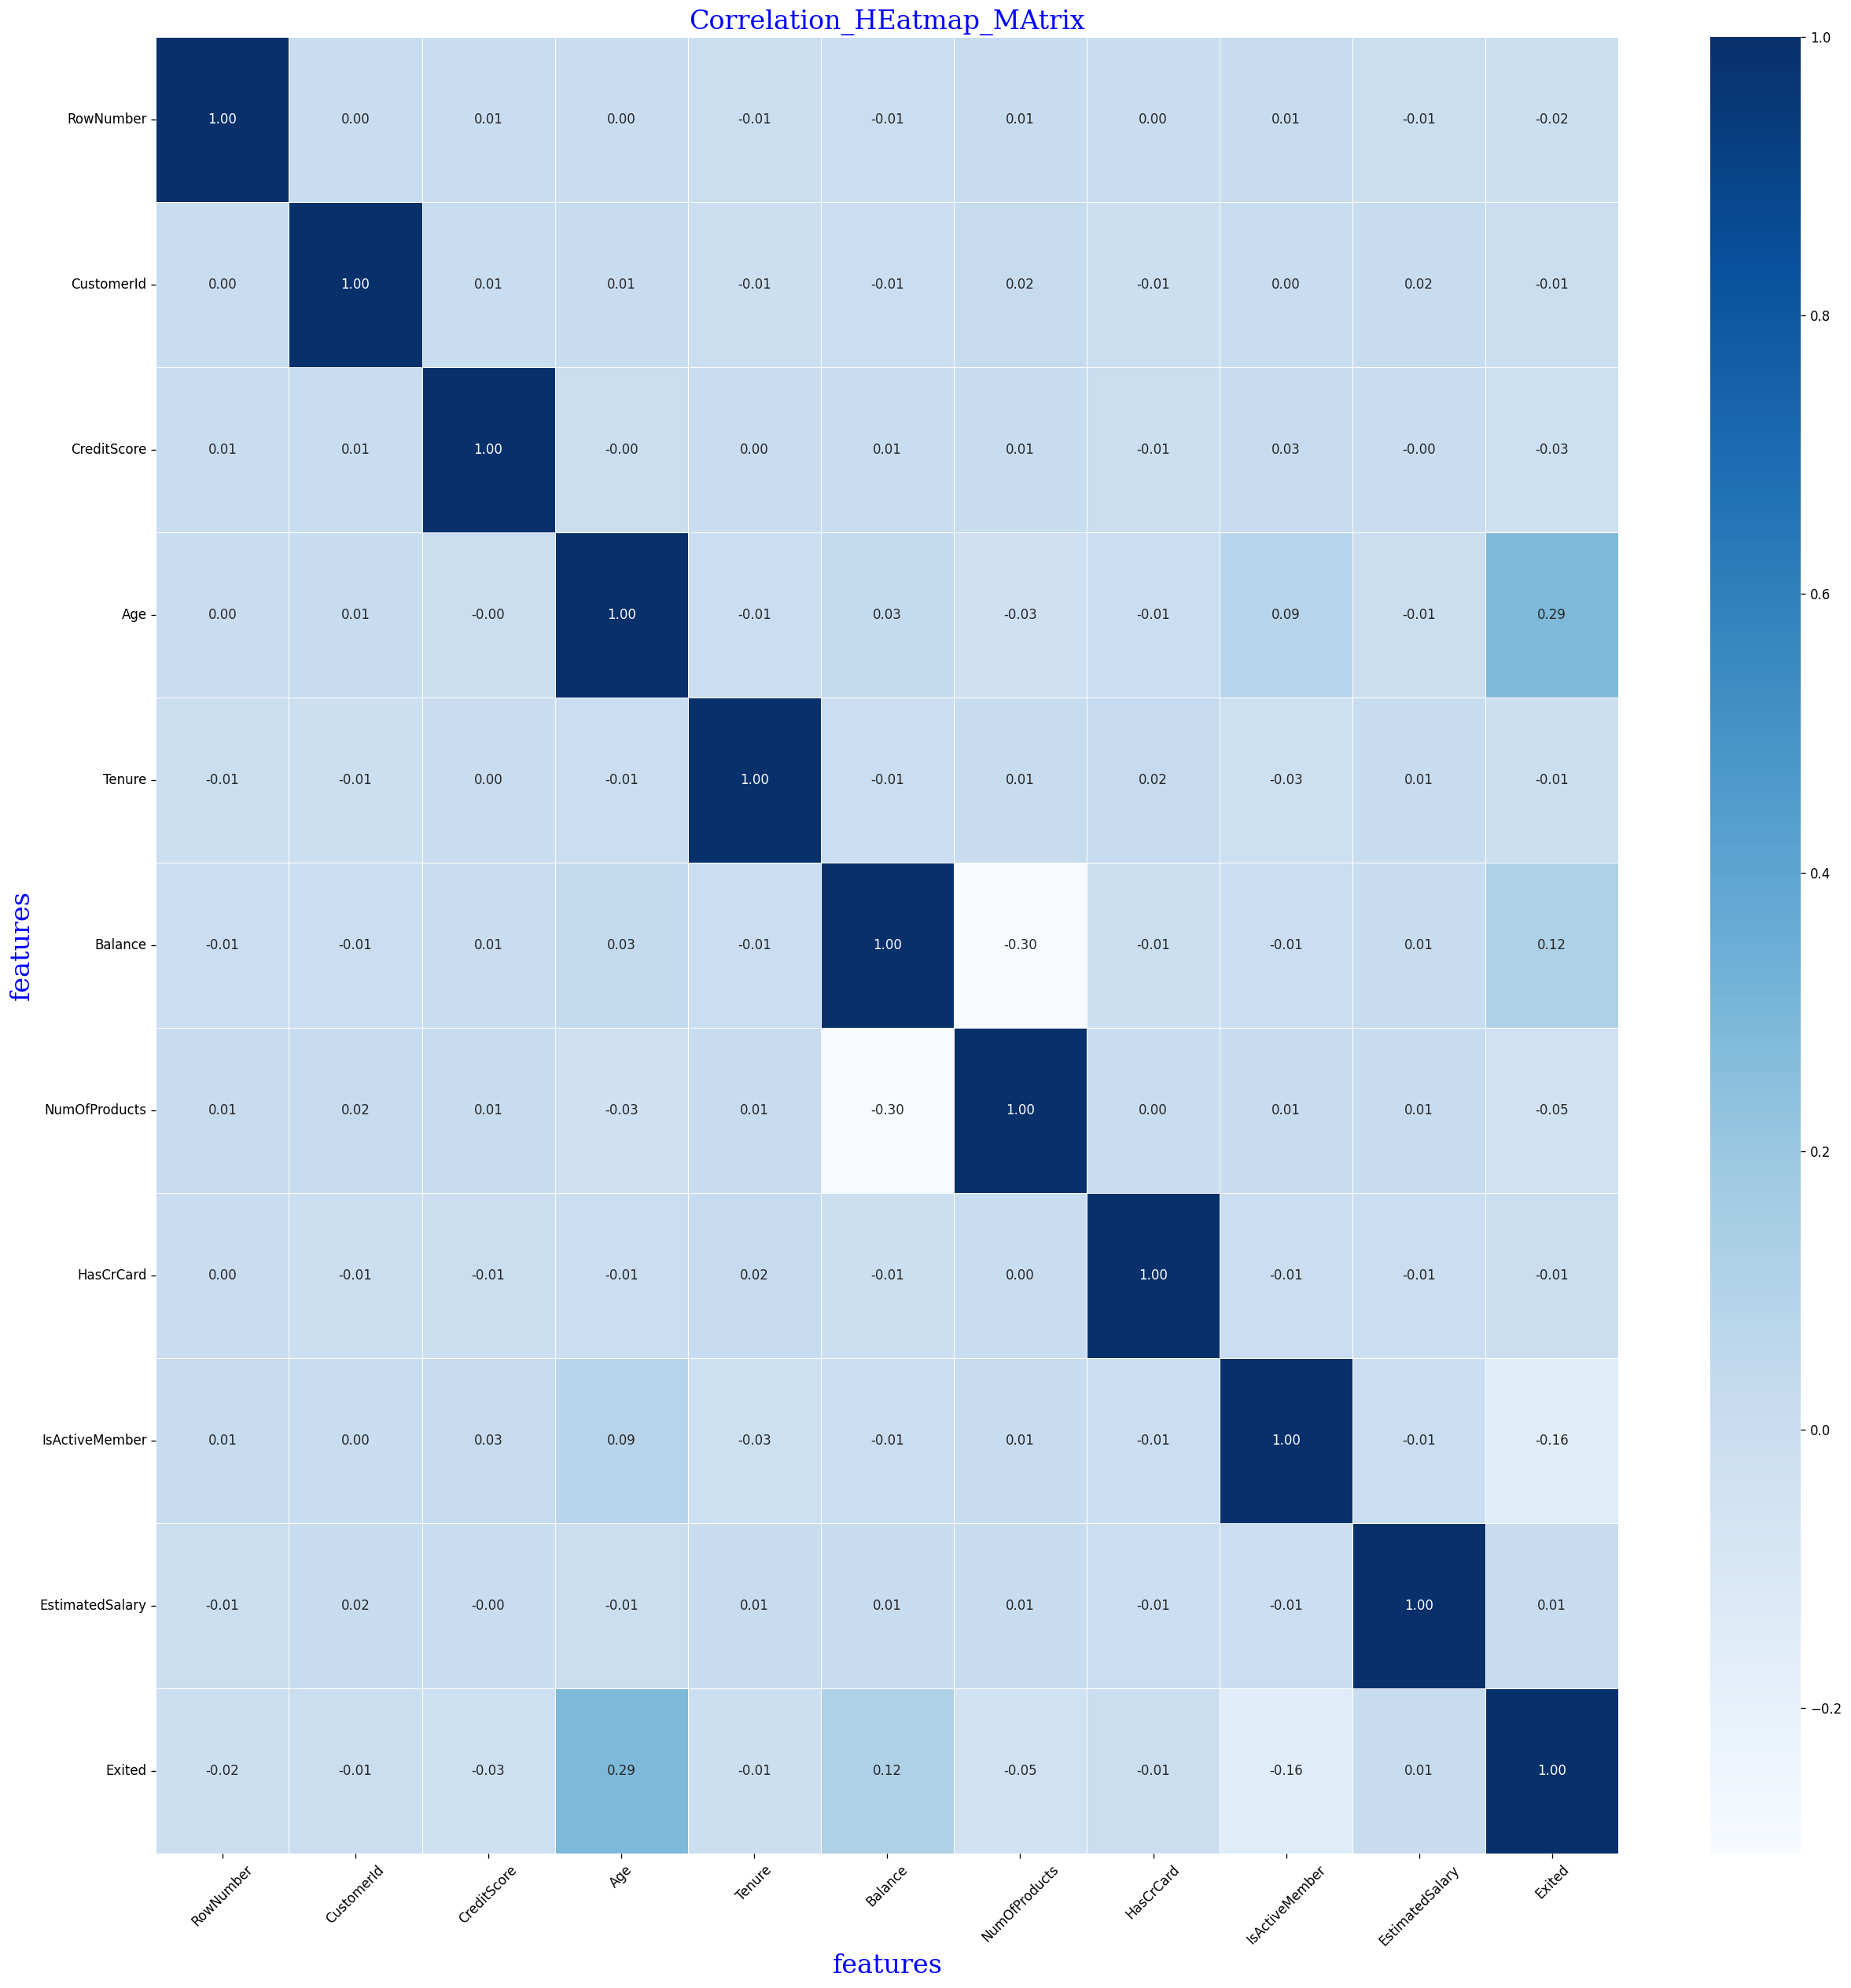

In [17]:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_HEatmap_MAtrix",fontdict=f1)

## Defination outliers & See Normal Distribution on the some Data features :

In [18]:
# There are many outliers in many features  :
features=data.select_dtypes("number").columns
for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr 
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]: 
         if ((x> upper_limit) or (x<low_limit)): 
             outlier.append(x)           
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")
       
    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in RowNumber feature

Q1 of RowNumber --->>> 2500.75 

 Q3 of RowNumber ---->>> 7500.25 

 iqr--->>4999.5

 low_limit--->>>-4998.5 

  upper_limit--->>> 14999.5 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in CustomerId feature

Q1 of CustomerId --->>> 15628528.25 

 Q3 of CustomerId ---->>> 15753233.75 

 iqr--->>124705.5

 low_limit--->>>15441470.0 

  upper_limit--->>> 15940292.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

Ther outlier in this feature CreditScore

Q1 of CreditScore --->>> 584.0 

 Q3 of CreditScore ---->>> 718.0 

 iqr--->>134.0

 low_limit--->>>383.0 

  upper_limit--->>> 919.0 

 outlier---->>> [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350] 

 Number of outliers --->>> 15

-------------------------

Ther outlier in this feature Age

Q1 of Age --->>> 32.0 

 Q3 of Age ---->>> 44.0 

 iqr--->>12.0

 low_limit--->>>14

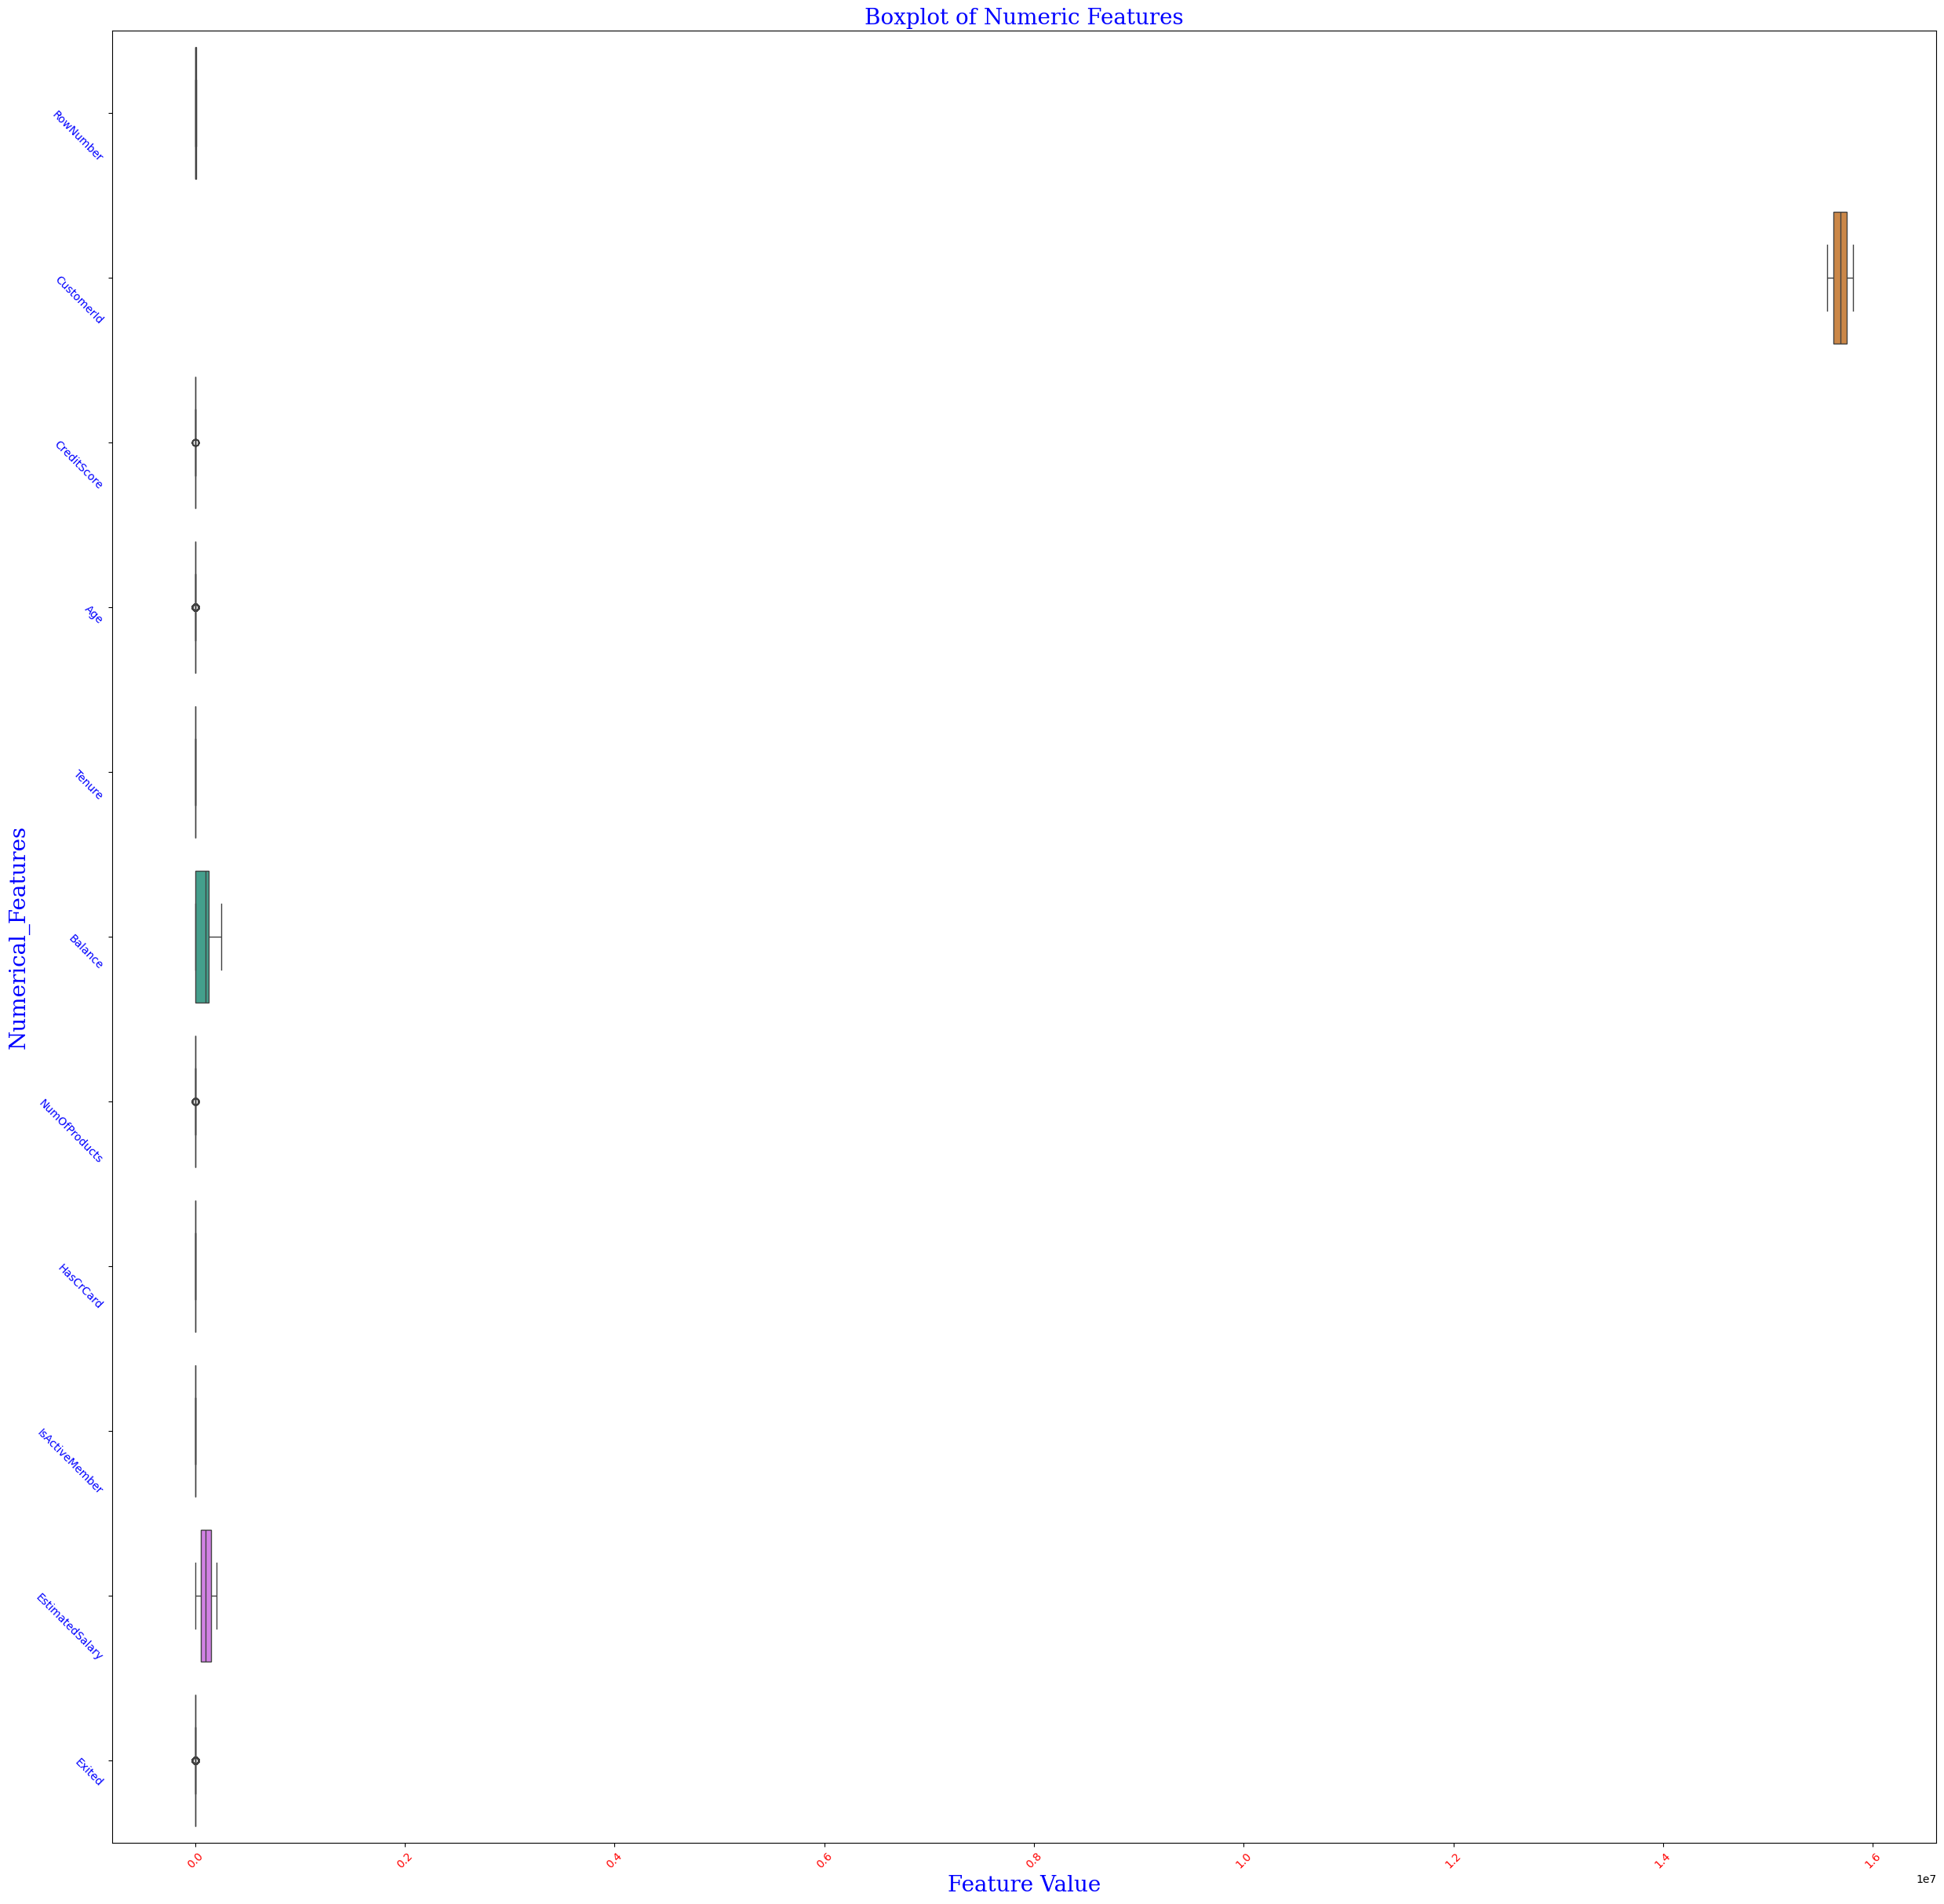

In [19]:
# Check if there Any outliers :Boxplot
plt.figure(figsize=(30, 30))
sns.boxplot(data=data.select_dtypes("number"), orient='h')
plt.title('Boxplot of Numeric Features',fontdict=f1)
plt.xlabel('Feature Value',fontdict=f1)
plt.xticks(rotation=45,color="r")
plt.yticks(rotation=-45,color="b")
plt.ylabel("Numerical_Features",fontdict=f1)
plt.show()

upper_limit :  940.488696208391

lower_limit :  360.568903791609

Mean Value :  650.5288

Median Value :  652.0

1st Standard Deviation :  96.65329873613035


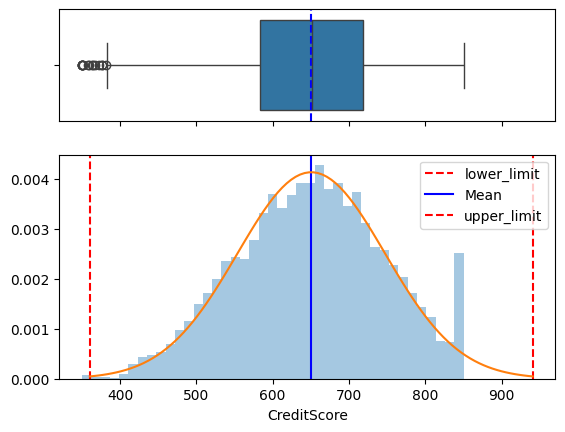

In [20]:
# we detect from the outliers in CreditScore
# we found the this feature follow Standard Normal Distribution and this is good 

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.CreditScore.mean()
std = data.CreditScore.std()
median = data.CreditScore.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["CreditScore"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["CreditScore"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

## Cleaning :


In [21]:
# ALL features of the data are Cleaned :
data.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [22]:
# check the Duplicates values : Not found Any Duplicated values 
data.duplicated().sum()

0

## Data processing and Training :

In [23]:
# Convert all Categorical columns into Numerical columns :

obj_cols = data.select_dtypes("object").columns

for col in obj_cols:
    dummies = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,False,False,False,False,False,False,False,False,False,True
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,False,False,False,False,False,False,False,False,False,True
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,False,False,False,False,False,False,False,False,False,False
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,False,False,False,False,False,False,False,True,False,True


In [24]:
# impute the data :
for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,...,False,False,False,False,False,False,False,False,False,True
9996,9997.0,15569892.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,...,False,False,False,False,False,False,False,False,False,True
9997,9998.0,15584532.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,...,False,False,False,False,False,False,False,False,False,False
9998,9999.0,15682355.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,...,False,False,False,False,False,False,False,True,False,True


In [25]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,1.730838,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,1.731185,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.731531,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


In [27]:
# split the data into Target & the other data:

x=data.drop(columns=["Exited","RowNumber","CustomerId"],axis=1)
y=data["Exited"]

print(np.shape(x),np.shape(y))

(10000, 2942) (10000,)


In [40]:
# train the data:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [41]:
# Convert data to NumPy arrays and ensure the correct data types
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(y_test))


(7000, 2942) (3000, 2942)

(7000,) (3000,)


## Bulding Neural Network model  :

In [34]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras.layers import Dense , Flatten



model.add(Dense(10, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)



history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_split = 0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb]) #batch_size=32

Epoch 1/30

197/197 [==============================] - 1s 1ms/step - loss: 3.9769 - accuracy: 0.7511 - val_loss: 1.3008 - val_accuracy: 0.7943

Epoch 2/30

197/197 [==============================] - 0s 724us/step - loss: 1.1511 - accuracy: 0.7802 - val_loss: 2.1084 - val_accuracy: 0.7943

Epoch 3/30

197/197 [==============================] - 0s 788us/step - loss: 0.9569 - accuracy: 0.7808 - val_loss: 1.4622 - val_accuracy: 0.7943

Epoch 4/30

197/197 [==============================] - 0s 791us/step - loss: 0.7368 - accuracy: 0.7859 - val_loss: 0.6945 - val_accuracy: 0.7886

Epoch 5/30

197/197 [==============================] - 0s 824us/step - loss: 0.6716 - accuracy: 0.7822 - val_loss: 0.5774 - val_accuracy: 0.7886

Epoch 6/30

197/197 [==============================] - 0s 820us/step - loss: 0.6045 - accuracy: 0.7884 - val_loss: 0.5996 - val_accuracy: 0.7943

Epoch 7/30

197/197 [==============================] - 0s 981us/step - loss: 0.6399 - accuracy: 0.7867 - val_loss: 0.5482 - va

In [42]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 503us/step - loss: 0.4940 - accuracy: 0.8053


[0.49395230412483215, 0.8053333163261414]

In [43]:
y_pred = np.round(model.predict(x_test))

94/94 [==============================] - 0s 449us/step


In [44]:
print(y_pred.shape)
print(y_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)



(3000, 1)

(3000,)

(3000, 1)


In [45]:
confusion_matrix(y_test,y_pred)


array([[2416,    0],
       [ 584,    0]])

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



         0.0       0.81      1.00      0.89      2416

         1.0       0.00      0.00      0.00       584



    accuracy                           0.81      3000

   macro avg       0.40      0.50      0.45      3000

weighted avg       0.65      0.81      0.72      3000




## Visualization of Neural Network Model 

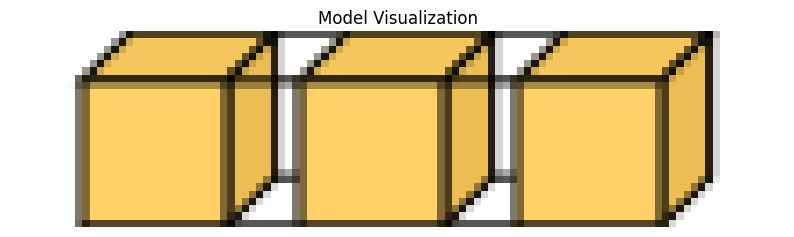

In [48]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model Visualization")
plt.axis('off')
plt.show()

## Results Train 

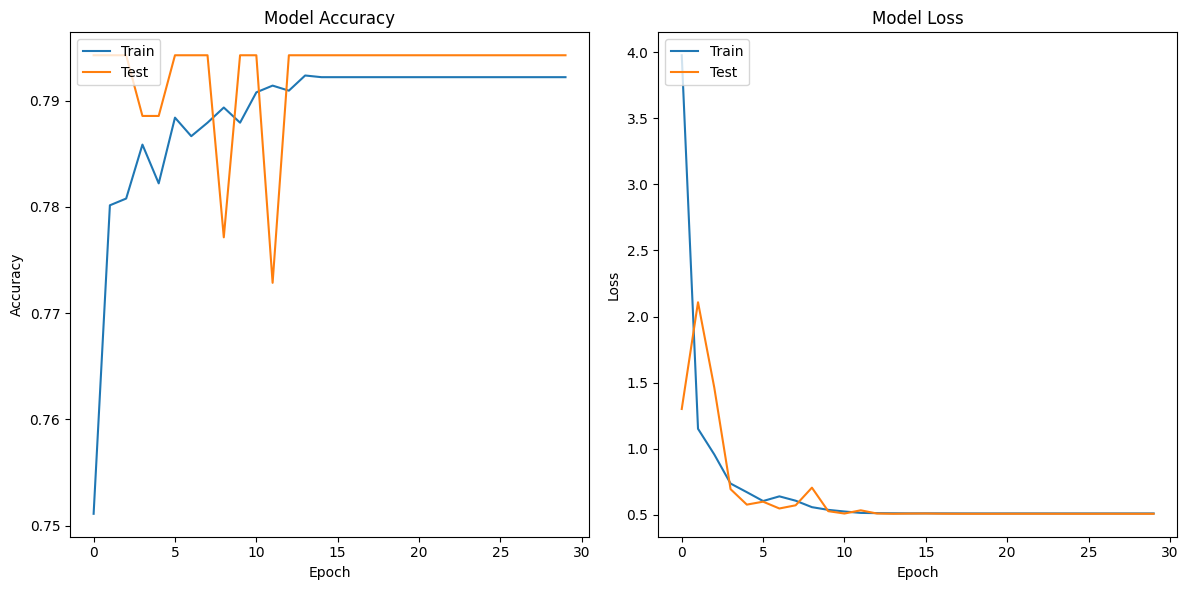

In [49]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Conclusion :














<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


    
<p>&bull; in the Conclusion im whish that you could understand how to build build a Artifical  Neural Network (ANN) Model .                        Classification , Thank you for following my Notebooks .</p>




<p>&bull; Thank you for reading this notebook! If you found this content useful, please consider giving it an upvote.</p>




<p>&bull; Your support is greatly appreciated! .</p>




<p>&bull; Kaggle: Your Home for Data Science</p>




<p>&bull; <a href="https://www.kaggle.com/abdalrhamnhebishy" target="_blank">Kaggle profile</a>.</p>



<p>&bull;  AbdalRhman Hebishy , DataScientist & Machine learning  Specialist .</p>
   

</div>


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFTGJtkDNAhg8bRVkL2zq1GYewSNkGxuD14A&s" alt="My Image">